# Model exploration

Ideally I'd like to develop a regression model to get an estimate for enterococci and E. coli amount in
the water given current (and past few days) weather data. Classification of bad and good water quality
might be an easier task for starters. For that I could also utilise the measurements from other beaches
than Pikkukoski as the water quality some what correlates with beaches upstream. 

First I think I'll try to use logistic regression as a baseline to try to see if with cross validation we
can get some result.

Then I think I'll just try linear regression with lag features for rain, and do it for both enterococci
and E. coli. I won't use other beaches for training for this task as it seems there's some discrepancy
between the measurements even during the same day for different beaches. Because of how the the bad
quality is defined we can just use the original thresholds for bad water quality given the predicted
E. coli and enterococci amounts.

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from load_dataset import load_dataset, get_filenames

weather_files, measurement_files = get_filenames()

X, Y = load_dataset(weather_files, measurement_files)

In [2]:
y_quality_pikkukoski = Y[["quality_pikkukoski"]]

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y_quality_pikkukoski)

print(model.predict_proba(X))

[[6.53599185e-03 9.93464008e-01]
 [2.51902147e-03 9.97480979e-01]
 [9.62075329e-01 3.79246713e-02]
 [2.51902147e-03 9.97480979e-01]
 [2.61876407e-03 9.97381236e-01]
 [2.24336006e-03 9.97756640e-01]
 [1.29434293e-02 9.87056571e-01]
 [9.99997114e-01 2.88611118e-06]
 [9.99998009e-01 1.99129483e-06]
 [9.68045119e-01 3.19548806e-02]
 [2.51902147e-03 9.97480979e-01]
 [2.51902147e-03 9.97480979e-01]
 [4.01783219e-03 9.95982168e-01]
 [5.34637442e-03 9.94653626e-01]
 [2.51902147e-03 9.97480979e-01]
 [9.76603500e-01 2.33965002e-02]
 [2.56651413e-02 9.74334859e-01]
 [1.91912993e-02 9.80808701e-01]
 [2.30880391e-03 9.97691196e-01]]


/Users/laurisaikkonen/code/pikkukoski-analysis/env/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.model_selection import cross_val_score
print(y_quality_pikkukoski.shape)
print(cross_val_score(LogisticRegression(), X, y_quality_pikkukoski.values.ravel(), cv=3))
print(cross_val_score(LogisticRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], y_quality_pikkukoski.values.ravel(), cv=3))

(19, 1)
[0.85714286 1.         0.66666667]
[1.         1.         0.66666667]


In [14]:
from sklearn.linear_model import LinearRegression

features = ["kumpula_rain_now", "kumpula_rain_lag1", "kumpula_rain_lag2", "helsinki-vantaa_rain_lag1", "helsinki-vantaa_rain_lag2", "kumpula_rain_rolling_sum10", "helsinki-vantaa_rain_rolling_sum10"]

print("Logistic regression prediction cross validation")
print(cross_val_score(LogisticRegression(), X[features], y_quality_pikkukoski.values.ravel(), cv=5))

print("Linear regression prediction cross validation")
print(cross_val_score(LinearRegression(), X, Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], Y[["enterococci_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1"]], Y[["enterococci_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1"]], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))

model = LinearRegression()


model.fit(X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]])
print("------")
print(X[features].values)
print(model.predict(X[features]))
print(Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]].values)

Logistic regression prediction cross validation
[1.         0.75       0.75       0.25       0.66666667]
Linear regression prediction cross validation
[-9.94026373e-02 -1.28039983e+09 -1.59740658e+03]
[ 0.41818721 -0.52982107 -4.68115763]
[ 0.35293486 -0.21384258 -0.53455486]
[ 0.55464784 -0.27129853 -0.28510182]
[ 0.60440019 -0.55458229 -1.36898502]
[-37.98180812 -14.31461994  -8.65323256]
------
[[2.100e-01 7.500e-01 0.000e+00 1.210e+00 0.000e+00 1.010e+00 1.460e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.110e+01 0.000e+00 6.490e+00 0.000e+00 1.110e+01 6.490e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.800e-01 1.300e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.685e+01 2.042e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.110e+00 1.722e+01 1.536e+01]
 [0.000e+00 7.590e+00 8.990e+00 1.433e+01 2.910e+00 3.099e+01 5.450e+01]
 [0.000e+00 7.1

# Results thus far

Seems using all features makes linear regression prediction overfit. With some experimentation the best
features seem to be current rain (within 12h) in kumpula and previous 12h rain (lag1) in helsinki-vantaa

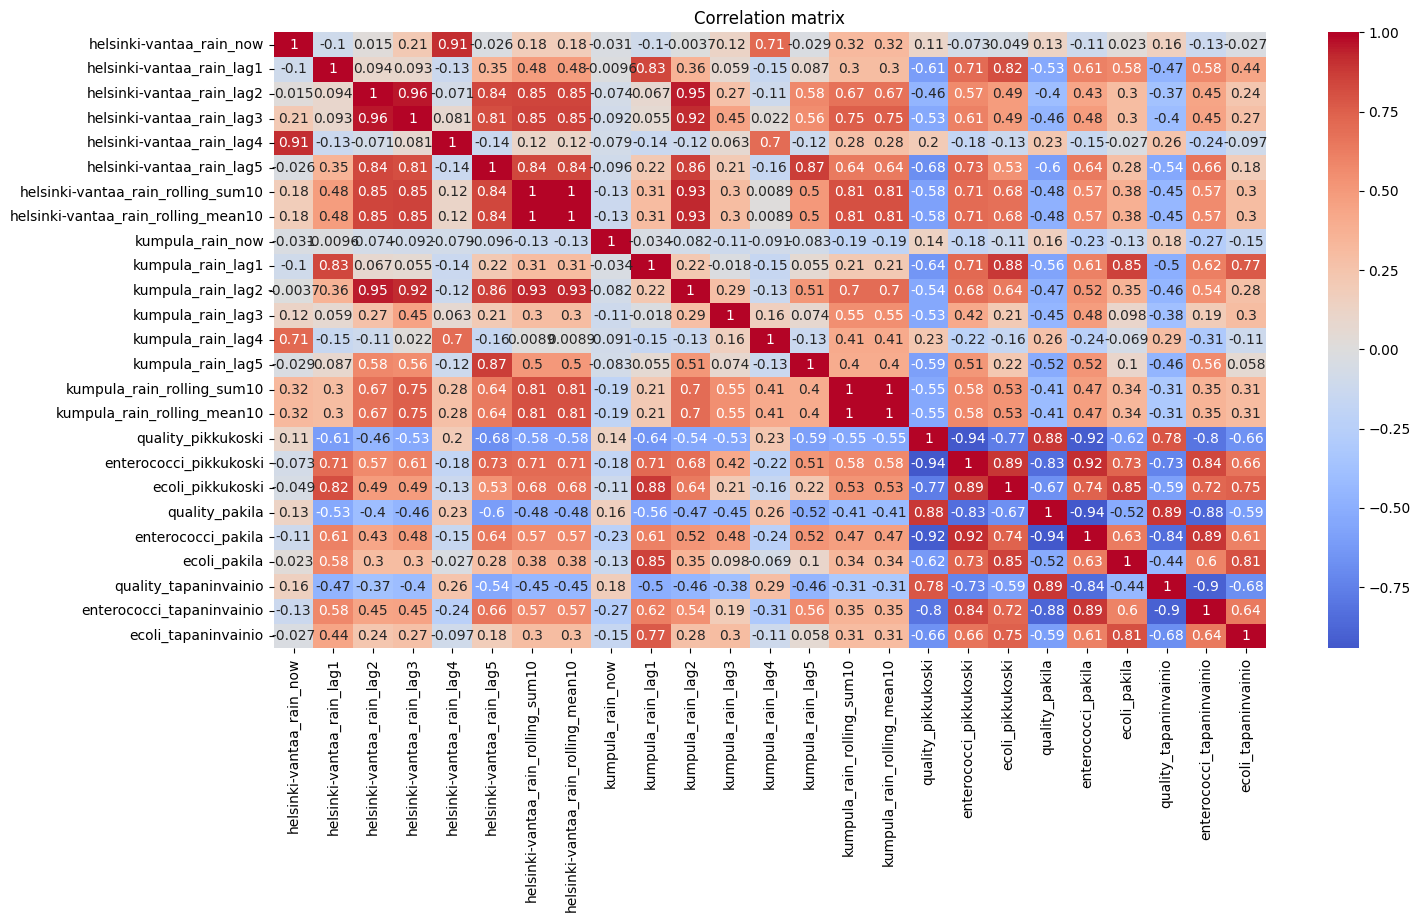

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Build a correlation matrix of features
df = pd.merge(X, Y, on="date")
corr_matrix = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()


# Interpretation of correlation matrix

A negative correlation between quality (1 = good, 0 = bad, more rain -> worse result) and rain makes sense.
Seems there is an expected correlation between kumpula rain lags 1, 2, 3 (12h, 24h and 36h ago respectively).
However for the current rain (`*_rain_now`) and rain 48h ago (`*_rain_lag4`) there exists an interesting
correlation between the quality and rain amount as it isn't the same as for other more expected lags.

The strange and minor correlation between rain now and the quality shouldn't be too surprising as if there
is currently rain there might not be enough time to overflow the wastewater systems. However, the abnormal
relation between lag 4 and quality is more surprising and I don't personally have any idea what could cause
it.